# Семинар 5. Функциональный анализ RNA-Seq

На прошлом занятии мы разобрались, как выполнять анализ дифференциальной экспрессии в bulk RNA-Seq, а сейчас мы займёмся следующей ступенью: осмыслению результатов.

In [1]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1saZcoMgLnhM-U9qZTKVVh5_y8nKdufH5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0
Downloading...
From: https://drive.google.com/uc?id=1saZcoMgLnhM-U9qZTKVVh5_y8nKdufH5
To: /content/LUAD_tpms.tsv
100% 5.71M/5.71M [00:00<00:00, 49.4MB/s]


In [2]:
!pip3 install gseapy==0.10.8
!wget https://raw.githubusercontent.com/BostonGene/MFP/master/signatures/gene_signatures.gmt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 526 kB 4.8 MB/s 
     |████████████████████████████████| 190 kB 65.9 MB/s 
     |████████████████████████████████| 47 kB 4.2 MB/s 
     |████████████████████████████████| 48 kB 5.2 MB/s 
     |████████████████████████████████| 144 kB 62.9 MB/s 
     |████████████████████████████████| 6.5 MB 61.9 MB/s 
     |████████████████████████████████| 261 kB 49.6 MB/s 
     |████████████████████████████████| 127 kB 44.4 MB/s 
  Created wheel for bioservices: filename=bioservices-1.11.0-py3-none-any.whl size=221946 sha256=5c4be3d10d222ba79735997554cf2714f680dee83a869ff0bb920e066822fd1f
  Stored in directory: /root/.cache/pip/wheels/21/53/2d/3eff1919e1497f2138fe865eef9fb40c48bb6ac4e101e82293
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=e74f80dbd11487bbe281d518108550192b5c48e73f813927cad9abe6c1a063e0
  Stored in director

## ssGSEA

Мы начнём с того, что оценим выраженность различных сигнатур на выборке из 40 пациентов из TCGA с мелкоклеточным раком лёгкого (аденокарциномой). Сначала прочитаем сами экспрессии (TPM'ы) и сигнатуры.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv("LUAD_tpms.tsv", sep="\t", index_col=0)
# check if its really tpms!!!

In [4]:
df.head()

,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_30,sample_31,sample_32,sample_33,sample_34,sample_35,sample_36,sample_37,sample_38,sample_39
gene_name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,66.6188,30.8641,49.0074,26.2930,33.3042,21.2396,27.6860,21.5216,20.9176,29.6342,...,17.9310,40.3438,36.4905,26.0784,64.4831,38.1012,39.5374,19.8138,92.9159,100.9814
TNMD,0.0000,0.0000,0.3909,0.0000,0.0000,0.0547,0.0000,0.0000,0.0516,0.0385,...,0.0000,0.0000,0.0000,0.0000,0.0341,0.0000,0.0942,0.0394,0.0000,0.0000
DPM1,62.7215,57.7683,100.4148,101.5311,131.3756,121.1338,91.9328,80.8797,122.3942,129.9132,...,73.1099,113.4803,39.1291,71.7836,69.3211,72.1219,65.9949,75.2805,93.6382,116.7757
SCYL3,6.4699,6.7535,5.9254,5.0267,4.9049,5.7325,2.9082,6.8832,6.0849,6.6611,...,5.5359,4.3670,5.7323,5.2044,5.5082,8.2238,7.5850,8.2349,7.1956,6.9593
C1orf112,6.4174,2.6260,2.3862,3.1833,6.0929,8.3392,1.5161,1.5036,1.3010,9.6212,...,1.8601,2.3130,2.6043,3.3570,5.0957,2.2523,3.4949,1.4120,2.4114,9.0065


In [5]:
df.sum(axis=0)

sample_0     921768.2277
sample_1     773689.8603
sample_2     905394.1351
sample_3     547859.7022
sample_4     917390.7828
sample_5     667082.0540
sample_6     911236.3861
sample_7     903503.6863
sample_8     884682.4429
sample_9     899720.6487
sample_10    578471.3742
sample_11    642213.7178
sample_12    917540.8939
sample_13    872705.6798
sample_14    919154.1448
sample_15    830999.4933
sample_16    939424.0639
sample_17    918314.9963
sample_18    926293.4282
sample_19    894215.9831
sample_20    869333.3731
sample_21    878939.5633
sample_22    928181.6650
sample_23    840550.4695
sample_24    942695.4354
sample_25    930504.0828
sample_26    794564.5523
sample_27    808033.1439
sample_28    935267.4354
sample_29    694224.3539
sample_30    936290.9312
sample_31    779276.5556
sample_32    917493.0480
sample_33    743847.8828
sample_34    928445.3613
sample_35    900043.3545
sample_36    897210.0800
sample_37    947414.8545
sample_38    899362.1245
sample_39    938737.7766


In [3]:
signatures = {}

with open("gene_signatures.gmt") as f:
  for line in f.readlines():
    signatures[line.split("\t")[0]] = line.strip().split("\t")[2:]

In [5]:
signatures

{'MHCI': ['HLA-A', 'HLA-B', 'HLA-C', 'B2M', 'TAP1', 'TAP2', 'NLRC5', 'TAPBP'],
 'MHCII': ['HLA-DRA',
  'HLA-DRB1',
  'HLA-DMA',
  'HLA-DPA1',
  'HLA-DPB1',
  'HLA-DMB',
  'HLA-DQB1',
  'HLA-DQA1',
  'CIITA'],
 'Coactivation_molecules': ['CD28',
  'CD40',
  'TNFRSF4',
  'ICOS',
  'TNFRSF9',
  'CD27',
  'CD80',
  'CD86',
  'CD40LG',
  'CD83',
  'TNFSF4',
  'ICOSLG',
  'TNFSF9',
  'CD70'],
 'Effector_cells': ['IFNG',
  'GZMA',
  'GZMB',
  'PRF1',
  'GZMK',
  'ZAP70',
  'GNLY',
  'FASLG',
  'TBX21',
  'EOMES',
  'CD8A',
  'CD8B'],
 'T_cell_traffic': ['CXCL9',
  'CXCL10',
  'CXCL11',
  'CX3CL1',
  'CCL3',
  'CCL4',
  'CX3CR1',
  'CCL5',
  'CXCR3'],
 'NK_cells': ['NKG7',
  'CD160',
  'CD244',
  'NCR1',
  'KLRC2',
  'KLRK1',
  'CD226',
  'GZMH',
  'GNLY',
  'IFNG',
  'KIR2DL4',
  'EOMES',
  'GZMB',
  'FGFBP2',
  'KLRF1',
  'SH2D1B',
  'NCR3'],
 'T_cells': ['TBX21',
  'ITK',
  'CD3D',
  'CD3E',
  'CD3G',
  'TRAC',
  'TRBC1',
  'TRBC2',
  'CD28',
  'CD5',
  'TRAT1'],
 'B_cells': ['CD19',
  'MS4

А теперь запустим GSEApy и оценим выраженность сигнатур в этих образцах. Для примера мы взяли сигнатуры из <a href="https://www.cell.com/cancer-cell/fulltext/S1535-6108(21)00222-1">статьи</a>, в которой охарактеризовывают опухоли по выраженности экспрессионных иммуного микроокружения сигнатур в них.

In [4]:
import gseapy as gp

ss = gp.ssgsea(
    data=df,
    gene_sets=signatures.copy(),
    outdir=None,
    min_size=3,
    sample_norm_method="rank",
    no_plot=True
)
ssGSEA = ss.res2d

2023-01-01 16:41:17,243 Warning: dropping duplicated gene names, only keep the first values


Теперь образцы это не векторы из экспрессии генов, а векторы из значений enrichment scores.

In [7]:
ssGSEA

,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_30,sample_31,sample_32,sample_33,sample_34,sample_35,sample_36,sample_37,sample_38,sample_39
Term|NES,,,,,,,,,,,,,,,,,,,,,
Angiogenesis,0.195289,0.261032,0.252532,0.181914,0.419631,0.154617,0.074766,0.357795,0.205504,0.194439,...,0.207338,0.247776,0.224598,0.304824,0.322294,0.206094,0.243979,0.309402,0.262679,0.145003
Antitumor_cytokines,-0.165357,-0.120661,0.008693,-0.078029,-0.040919,-0.077100,-0.075642,-0.023327,-0.173079,-0.171326,...,-0.130661,-0.059094,-0.204562,-0.187868,-0.055969,-0.181070,-0.149271,-0.094174,-0.211618,-0.117931
B_cells,-0.141453,0.456771,0.054276,0.164076,-0.210139,0.063565,-0.069972,0.012393,0.040274,-0.161577,...,-0.134691,-0.004745,-0.225046,0.094150,-0.207130,-0.037744,-0.042691,-0.242928,-0.074031,-0.225874
CAF,0.271280,0.459314,0.454430,0.455217,0.514296,0.390754,0.189702,0.402313,0.316260,0.388570,...,0.259691,0.433848,0.354097,0.480517,0.506492,0.314810,0.406762,0.408548,0.433575,0.385097
Checkpoint_inhibition,-0.035316,0.278316,0.074687,0.249158,0.210406,0.159383,0.054853,0.184657,-0.035137,-0.061606,...,-0.050107,0.036282,-0.142805,-0.003540,0.034322,0.005555,-0.048496,0.117785,-0.014972,0.138564
Coactivation_molecules,-0.114821,0.203679,0.116566,0.094882,0.045733,0.037657,0.012222,0.098916,-0.047164,-0.067877,...,-0.055568,-0.047083,-0.120383,-0.003160,0.025152,-0.002841,-0.086475,0.010476,-0.042675,0.002670
EMT_signature,-0.097332,0.056287,0.027327,0.018237,0.295246,-0.010634,-0.190856,0.036827,-0.085570,-0.027549,...,-0.149257,-0.004898,-0.101737,0.083189,0.094613,-0.097587,-0.047209,0.066204,-0.029066,-0.003798
Effector_cells,0.087455,0.240233,0.025635,0.239218,0.116085,0.139803,-0.007169,0.197210,-0.030560,-0.017709,...,-0.104449,0.132144,-0.216936,-0.083545,-0.242832,-0.034010,-0.153730,0.193601,-0.105401,-0.000815
Endothelium,0.068518,0.430392,0.287872,0.254444,0.431369,0.238401,0.126703,0.436720,0.289927,0.225744,...,0.246865,0.333477,0.214298,0.365588,0.352020,0.269647,0.326232,0.472652,0.329080,0.198643


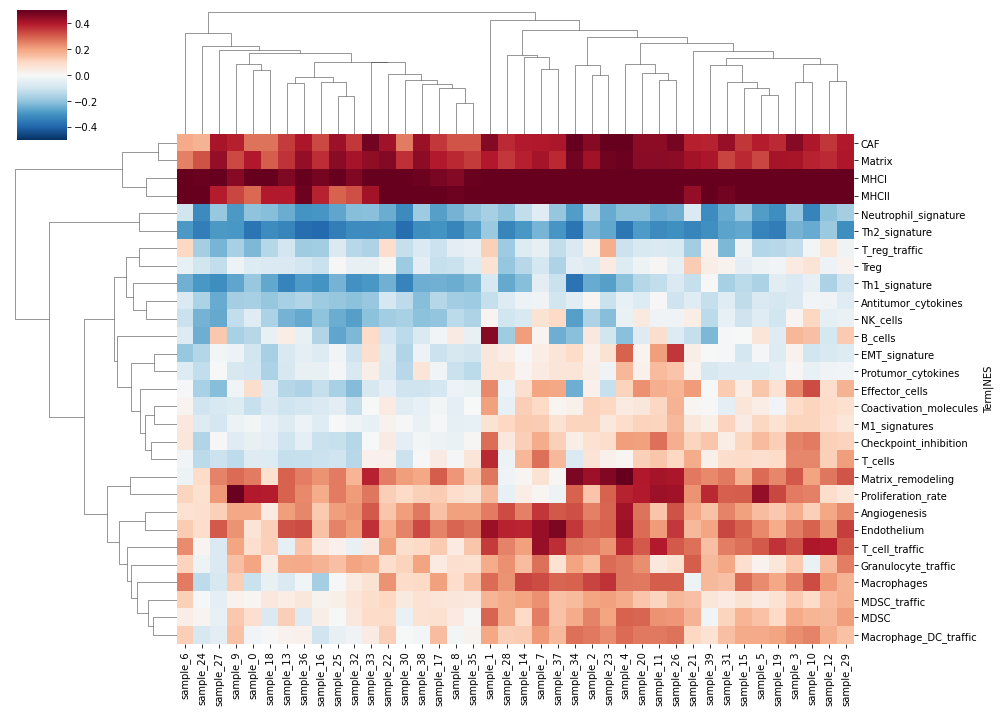

In [10]:
sns.clustermap(ssGSEA, cmap="RdBu_r", vmin=-0.5, vmax=0.5, figsize=(14, 10), method="average")

Теперь мы можем увидеть, что образцы, которые мы анализируем, делятся на две группы в зависимости от выраженности экспрессионных сигнатур, и мы можем объяснить, почему они делятся именно на эти две группы.

## GSEA

Теперь давайте выполним стандартный GSEA с теми же генными наборами, что мы использовали в прошлый раз, и с кластерами, которые мы получили из ssGSEA. Сначала возьмём кластера, которые у нас получились на прошлом шаге.

In [5]:
from scipy.spatial import distance
from scipy.cluster import hierarchy

labels = ["low_immune" if i == 1 else "immune" for i in hierarchy.fcluster(
  hierarchy.linkage(distance.pdist(ssGSEA.T), method="average"),
  t=2,
  criterion="maxclust"
)]

labels

['low_immune',
 'immune',
 'immune',
 'immune',
 'immune',
 'immune',
 'low_immune',
 'immune',
 'low_immune',
 'low_immune',
 'immune',
 'immune',
 'immune',
 'low_immune',
 'immune',
 'immune',
 'low_immune',
 'low_immune',
 'low_immune',
 'immune',
 'immune',
 'immune',
 'low_immune',
 'immune',
 'low_immune',
 'low_immune',
 'immune',
 'low_immune',
 'immune',
 'immune',
 'low_immune',
 'immune',
 'low_immune',
 'low_immune',
 'immune',
 'low_immune',
 'low_immune',
 'immune',
 'low_immune',
 'immune']

Теперь запустим GSEA на этих кластерах.

In [6]:
gs_res = gp.gsea(
    data=df,
    gene_sets=signatures.copy(),
    cls=labels,
    min_size=3,
    permutation_type="phenotype",
    permutation_num=1000,
    outdir=None,
    method="signal_to_noise"
)

2023-01-01 16:41:25,499 Warning: dropping duplicated gene names, only keep the first values


Посмотрим, какие сигнатуры наиболее значимо различают наши группы, и отрисуем GSEA plot для одного значимого и одного не значимого случая

In [10]:
gs_res.res2d

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
Coactivation_molecules,-0.844764,-1.927998,0.001976,0.003836,14,14,ICOSLG;TNFSF9;TNFRSF4;CD70;TNFRSF9;CD27;TNFSF4...,TNFRSF9;CD27;TNFSF4;CD40LG;CD83;CD28;ICOS;CD80...
Macrophage_DC_traffic,-0.890048,-1.857563,0.000000,0.008312,8,8,XCL1;CCL8;CCL7;XCR1;CSF1;CCL2;CSF1R;CCR2,CCL8;CCL7;XCR1;CSF1;CCL2;CSF1R;CCR2
Checkpoint_inhibition,-0.918716,-1.862129,0.000000,0.012469,9,9,LAG3;BTLA;CD274;CTLA4;VSIR;TIGIT;PDCD1;HAVCR2;...,BTLA;CD274;CTLA4;VSIR;TIGIT;PDCD1;HAVCR2;PDCD1LG2
M1_signatures,-0.756424,-1.750038,0.003717,0.019502,9,9,IL12B;SOCS3;IL23A;IL12A;NOS2;IRF5;TNF;CMKLR1;IL1B,SOCS3;IL23A;IL12A;NOS2;IRF5;TNF;CMKLR1;IL1B
Effector_cells,-0.880715,-1.724430,0.015238,0.022779,12,12,GNLY;TBX21;GZMB;GZMK;ZAP70;EOMES;IFNG;PRF1;FAS...,GZMB;GZMK;ZAP70;EOMES;IFNG;PRF1;FASLG;CD8B;CD8...
NK_cells,-0.836864,-1.716737,0.017408,0.022806,17,17,KIR2DL4;FGFBP2;KLRF1;GNLY;KLRC2;CD160;NCR3;GZM...,KLRC2;CD160;NCR3;GZMB;KLRK1;SH2D1B;EOMES;NCR1;...
T_cell_traffic,-0.858272,-1.750783,0.003914,0.023403,9,9,CX3CL1;CXCL11;CX3CR1;CXCR3;CXCL10;CCL3;CXCL9;C...,CXCL11;CX3CR1;CXCR3;CXCL10;CCL3;CXCL9;CCL5;CCL4
Macrophages,-0.922321,-1.766289,0.003846,0.023978,8,8,MRC1;CD68;SIGLEC1;MSR1;IL10;CSF1R;CD163;IL4I1,MRC1;CD68;SIGLEC1;MSR1;IL10;CSF1R;CD163;IL4I1
Antitumor_cytokines,-0.867284,-1.724958,0.000000,0.026033,6,5,IFNB1;TNFSF10;TNF;IL21;CCL3,TNFSF10;TNF;IL21;CCL3


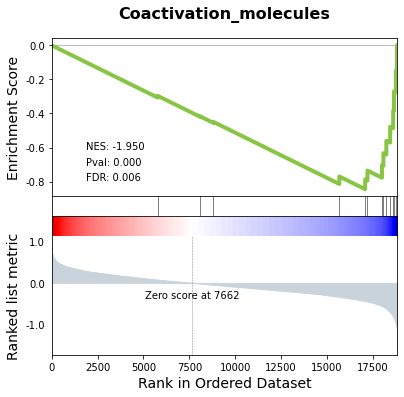

In [7]:
from gseapy import gseaplot, heatmap

group = "Coactivation_molecules"
gseaplot(gs_res.ranking, term=group, **gs_res.results[group])

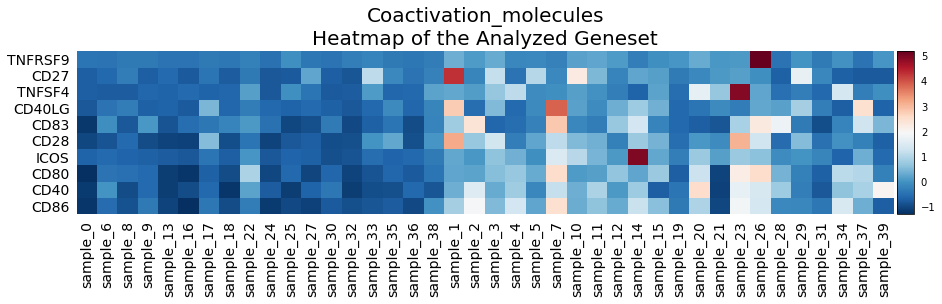

In [12]:
genes = gs_res.res2d.ledge_genes[group].split(";")
heatmap(df=gs_res.heatmat.loc[genes], z_score=0, title=group,
        figsize=(15, 3))

In [15]:
gs_res.res2d.tail(5)

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
B_cells,-0.660980,-1.048618,0.516187,0.476939,13,13,CR2;BLK;PAX5;TNFRSF13B;MS4A1;TNFRSF13C;CD79A;C...,CR2;BLK;PAX5;TNFRSF13B;MS4A1;TNFRSF13C;CD79A;C...
Granulocyte_traffic,-0.470767,-1.079537,0.397388,0.477255,9,9,CCR3;CXCL1;CXCL5;KITLG;CXCL2;CXCL8;CXCR1;CXCR2...,KITLG;CXCL2;CXCL8;CXCR1;CXCR2;CCL11
Neutrophil_signature,-0.468760,-1.058101,0.410781,0.484586,10,10,FFAR2;ELANE;PRTN3;CTSG;PGLYRP1;CD177;CXCR1;CXC...,CXCR1;CXCR2;MPO;FCGR3B
Matrix,-0.449455,-1.009782,0.474333,0.497957,15,15,LGALS7;VTN;ELN;LGALS9;LAMB3;LAMA3;COL4A1;COL5A...,COL4A1;COL5A1;COL11A1;COL1A2;COL1A1;TNC;COL3A1...
Proliferation_rate,-0.429716,-0.869625,0.611632,0.620720,15,15,AURKB;CCNB1;E2F1;CETN3;AURKA;PLK1;MCM6;MYBL2;C...,AURKA;PLK1;MCM6;MYBL2;CCND1;MCM2;ESCO2;MKI67;C...


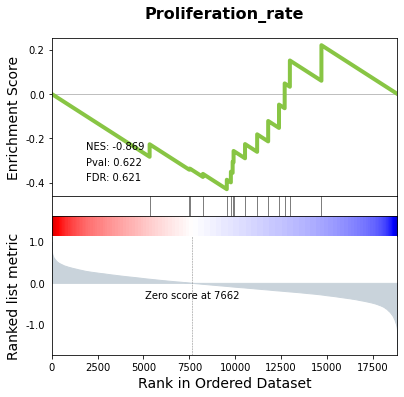

In [13]:
group = "Proliferation_rate"
gseaplot(gs_res.ranking, term=group, **gs_res.results[group])

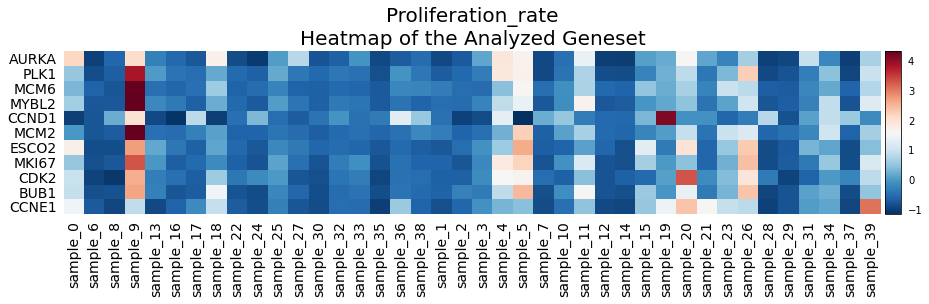

In [14]:
genes = gs_res.res2d.ledge_genes[group].split(";")
heatmap(df=gs_res.heatmat.loc[genes], z_score=0, title=group,
        figsize=(15, 3))

## Деконволюция bulk RNA-Seq

Существует много готовых инструментов для деконволюции, воспользуемся на сегодняшнем семинаре двумя из них: Ecotyper и Kassandra. Для начала подготовим нашу матрицу экспрессии, чтобы в ней не было дублирующихся названий генов.

In [ ]:
df.iloc[
    np.array([list(df.index).count(gene) for gene in df.index]) == 1
].to_csv("LUAD_tpms_norepet.tsv", sep="\t")

Теперь запустим инструмент <a href="https://ecotyper.stanford.edu">Carcinoma EcoTyper</a> и загрузим его выдачу в Google Colab.

In [ ]:
!mkdir ecotyper && mv ecotyper_output.zip ecotyper
!cd ecotyper && unzip ecotyper_output.zip

Archive:  ecotyper_output.zip
   creating: Carcinoma_Cell_States/
   creating: Carcinoma_Cell_States/B.cells/
  inflating: Carcinoma_Cell_States/B.cells/B.cells_Cell_State_Assignment.txt  
  inflating: Carcinoma_Cell_States/B.cells/B.cells_Cell_State_Abundance.txt  
  inflating: Carcinoma_Cell_States/B.cells/B.cells_Heatmap.pdf  
   creating: Carcinoma_Cell_States/PCs/
  inflating: Carcinoma_Cell_States/PCs/PCs_Cell_State_Assignment.txt  
  inflating: Carcinoma_Cell_States/PCs/PCs_Cell_State_Abundance.txt  
  inflating: Carcinoma_Cell_States/PCs/PCs_Heatmap.pdf  
   creating: Carcinoma_Cell_States/CD8.T.cells/
  inflating: Carcinoma_Cell_States/CD8.T.cells/CD8.T.cells_Cell_State_Assignment.txt  
  inflating: Carcinoma_Cell_States/CD8.T.cells/CD8.T.cells_Cell_State_Abundance.txt  
  inflating: Carcinoma_Cell_States/CD8.T.cells/CD8.T.cells_Heatmap.pdf  
   creating: Carcinoma_Cell_States/CD4.T.cells/
  inflating: Carcinoma_Cell_States/CD4.T.cells/CD4.T.cells_Cell_State_Assignment.txt  
 

In [ ]:
import os
celltypes = os.listdir("ecotyper/Carcinoma_Cell_States/")

celltype_df = pd.DataFrame()
for celltype in celltypes:
  _ = pd.read_csv(f"ecotyper/Carcinoma_Cell_States/{celltype}/{celltype}_Cell_State_Abundance.txt", sep="\t", index_col=0)
  celltype_df[celltype] = _.sum(axis=1)

In [ ]:
celltype_df.columns

Index(['NK.cells', 'CD4.T.cells', 'Endothelial.cells', 'CD8.T.cells',
       'Epithelial.cells', 'B.cells', 'PMNs', 'PCs', 'Fibroblasts',
       'Dendritic.cells', 'Mast.cells', 'Monocytes.and.Macrophages'],
      dtype='object')

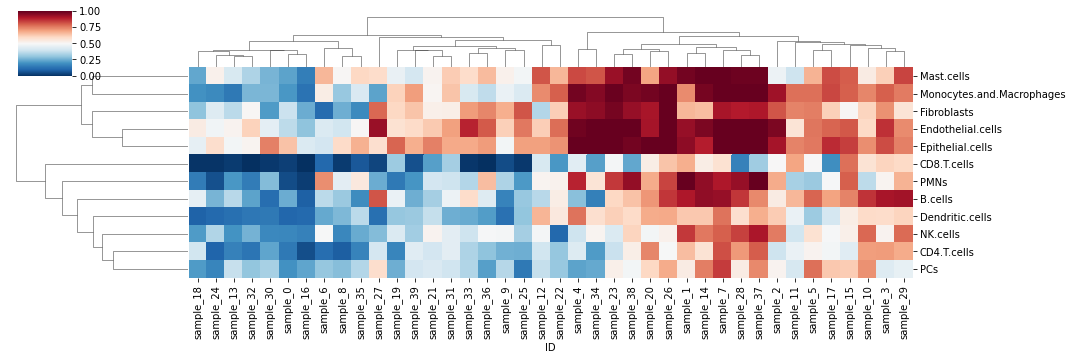

In [ ]:
sns.clustermap(celltype_df.T, figsize=(15, 5), cmap="RdBu_r")

### Задание

Попробуйте самостоятельно запустить алгоритм деконволюции <a href="https://science.bostongene.com/kassandra/">Kassandra</a> и сравните результаты различных деконволюций. Сходятся ли они? В чём разница?

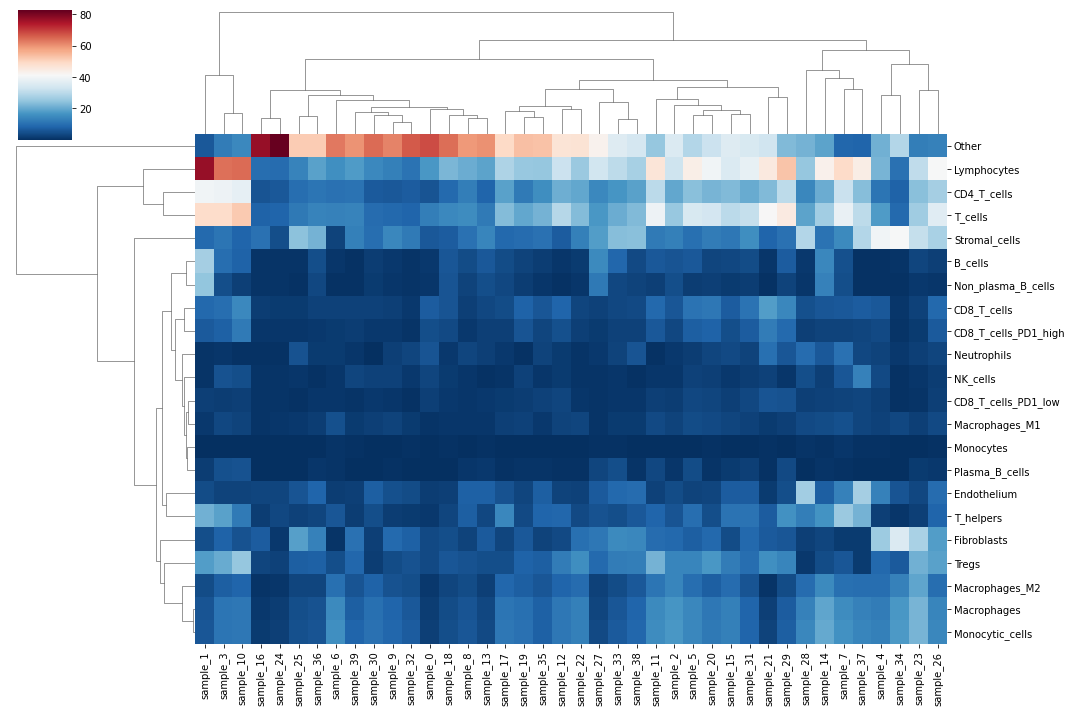

In [ ]:
kass_pred = pd.read_csv("predictions.tsv", sep="\t", index_col=0)
sns.clustermap(kass_pred, figsize=(15, 10), cmap="RdBu_r")

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_data = scale.fit_transform(kass_pred.T)
scaled_data = pd.DataFrame(scaled_data.T, index=kass_pred.index, columns=kass_pred.columns)

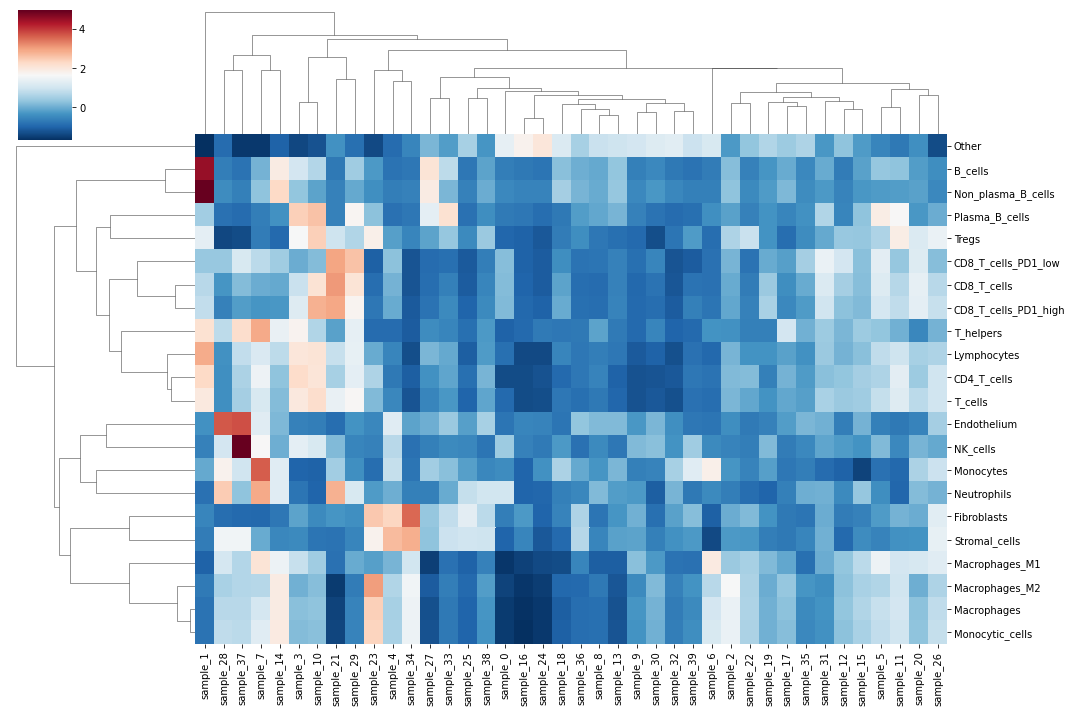

In [ ]:
sns.clustermap(scaled_data, figsize=(15, 10), cmap="RdBu_r")

## Домашнее задание

Скачайте каунты экспрессий для тех же образцов (Google Drive ID: `1nlpCcK6LoqEJnvCqEdcUFNElZSoz_3Kg`) и выполните дифференциальную экспрессию при помощи DESeq2 между кластерами, которые мы определили в начале семинара. Возьмите результат DESeq2, упорядочьте по

1. logFC,
2. —logFDR со знаком logFC,

и попробуйте на этом списке запустить `gsea.prerank` с сигнатурами, которые сегодня уже использовались. Сходится ли результат с тем, что получается при классическом запуске GSEA?

## Решение

Мы начнём с того, что оценим выраженность различных сигнатур на выборке из 40 пациентов из TCGA с мелкоклеточным раком лёгкого (аденокарциномой). Сначала прочитаем сами экспрессии (counts) и сигнатуры.

In [15]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1nlpCcK6LoqEJnvCqEdcUFNElZSoz_3Kg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Downloading...
From: https://drive.google.com/uc?id=1nlpCcK6LoqEJnvCqEdcUFNElZSoz_3Kg
To: /content/LUAD_counts.tsv
100% 3.18M/3.18M [00:00<00:00, 193MB/s]


Установим и ициниализацируем r-magic для работы с R через Google Colab

In [8]:
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Скачиваем необходимые пакеты и предоустановленные библиотеки для R

In [17]:
!apt-get install libgmp3-dev libcairo2-dev libharfbuzz-dev libfribidi-dev libudunits2-dev
!gdown --id 1HLNLtQPskzO0G9hbSCGI_VwVWoZjmuHV
!tar xf library*.tar.gz >> None
!cp -r /content/usr/local/lib/R /usr/local/lib/
!rm -r usr library*.tar.gz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libharfbuzz-dev is already the newest version (1.7.2-1ubuntu1).
libharfbuzz-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libcairo-script-interpreter2 libgmp-dev libgmpxx4ldbl libpixman-1-dev
  libudunits2-0 libudunits2-data libxcb-shm0-dev
Suggested packages:
  libcairo2-doc gmp-doc libgmp10-doc libmpfr-dev
The following NEW packages will be installed:
  libcairo-script-interpreter2 libcairo2-dev libfribidi-dev libgmp-dev
  libgmp3-dev libgmpxx4ldbl libpixman-1-dev libudunits2-0 libudunits2-data
  libudunits2-dev libxcb-shm0-dev
0 upgraded, 11 newly installed, 0 to remove and 20 not upgraded.
Need to get 1,735 kB of archives.
After this operation, 6,864 kB of additional disk space will be used.
Get:1 http://archive.ubu

In [ ]:
%R .libPaths("usr/local/lib/R/site-library/")
!Rscript -e 'install.packages("dplyr")'
!Rscript -e 'install.packages("ggplot2")'
!Rscript -e 'install.packages("tidyr")'
!Rscript -e 'install.packages("stringr")'
!Rscript -e 'BiocManager::install("DESeq2")'

Загрузим в R скачанные библиотек

In [9]:
%%R

suppressPackageStartupMessages({
  library(dplyr)
  library(ggplot2)
  library(tidyr)
  library(stringr)
  library(DESeq2)
  library(ggtree)
  library(enrichplot)
})

Загрузим датафрейм с каунтами в pandas

In [10]:
import pandas as pd
counts_df = pd.read_csv("LUAD_counts.tsv", sep="\t", index_col=0)

In [39]:
counts_df

,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_30,sample_31,sample_32,sample_33,sample_34,sample_35,sample_36,sample_37,sample_38,sample_39
gene_name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,4275,1536,5009,1889,1329,1194,1443,783,2492,2366,...,1919,2624,2257,2721,5817,4473,3868,1546,7846,3825
TNMD,0,0,13,0,0,1,0,0,2,1,...,0,0,0,0,1,0,3,1,0,0
DPM1,1071,765,2731,1941,1395,1812,1275,783,3880,2760,...,2082,1964,644,1993,1664,2253,1718,1563,2104,1177
SCYL3,630,510,919,548,297,489,230,380,1100,807,...,899,431,538,824,754,1465,1126,975,922,400
C1orf112,542,172,321,301,320,617,104,72,204,1011,...,262,198,212,461,605,348,450,145,268,449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AL451106.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AC008763.4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
AC006486.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Очистим датафрейм с каунтами от повторяющихся генов и сохраним его в виде `.csv` файла

In [11]:
import numpy as np

counts_df.iloc[
    np.array([list(counts_df.index).count(gene) for gene in counts_df.index]) == 1
].to_csv("LUAD_counts_norepet.csv", sep="\t")

In [12]:
counts_nonrepet = pd.read_csv("LUAD_counts_norepet.csv", sep="\t", index_col=0)
counts_nonrepet

,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_30,sample_31,sample_32,sample_33,sample_34,sample_35,sample_36,sample_37,sample_38,sample_39
gene_name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,4275,1536,5009,1889,1329,1194,1443,783,2492,2366,...,1919,2624,2257,2721,5817,4473,3868,1546,7846,3825
TNMD,0,0,13,0,0,1,0,0,2,1,...,0,0,0,0,1,0,3,1,0,0
DPM1,1071,765,2731,1941,1395,1812,1275,783,3880,2760,...,2082,1964,644,1993,1664,2253,1718,1563,2104,1177
SCYL3,630,510,919,548,297,489,230,380,1100,807,...,899,431,538,824,754,1465,1126,975,922,400
C1orf112,542,172,321,301,320,617,104,72,204,1011,...,262,198,212,461,605,348,450,145,268,449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AL451106.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AC008763.4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
AC006486.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Создадим датафрейм из одного столбца — condition, значения которого описывают степень "иммунности" клеток в исследумом образце ткани.

In [13]:
%%R -i labels -i counts_nonrepet

columns_data <- data.frame(condition = labels, row.names = colnames(counts_nonrepet))

In [43]:
%%R

columns_data

           condition
sample_0  low_immune
sample_1      immune
sample_2      immune
sample_3      immune
sample_4      immune
sample_5      immune
sample_6  low_immune
sample_7      immune
sample_8  low_immune
sample_9  low_immune
sample_10     immune
sample_11     immune
sample_12     immune
sample_13 low_immune
sample_14     immune
sample_15     immune
sample_16 low_immune
sample_17 low_immune
sample_18 low_immune
sample_19     immune
sample_20     immune
sample_21     immune
sample_22 low_immune
sample_23     immune
sample_24 low_immune
sample_25 low_immune
sample_26     immune
sample_27 low_immune
sample_28     immune
sample_29     immune
sample_30 low_immune
sample_31     immune
sample_32 low_immune
sample_33 low_immune
sample_34     immune
sample_35 low_immune
sample_36 low_immune
sample_37     immune
sample_38 low_immune
sample_39     immune


Создадим DESeq dataset из очищенных от повторов каунтов, а также датафрейм с одним столбцом, полученный в предыдущем щаге

In [14]:
%%R

dds <- DESeqDataSetFromMatrix(countData = counts_nonrepet,
                              colData = columns_data,
                              design = ~ condition)

In [45]:
%%R

length(dds)

[1] 19914


Проведем DESeq анализ

In [15]:
%%R

dds <- DESeq(dds)
res <- results(dds)
head(res)







-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)





log2 fold change (MLE): condition low immune vs immune 
Wald test p-value: condition low immune vs immune 
DataFrame with 6 rows and 6 columns
           baseMean log2FoldChange     lfcSE      stat      pvalue        padj
          <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
TSPAN6   2806.86378       0.347483  0.217687  1.596245 1.10434e-01 0.252285784
TNMD        1.27155       0.386053  0.866174  0.445699 6.55815e-01 0.795273272
DPM1     1535.80258      -0.142002  0.135404 -1.048726 2.94304e-01 0.487298288
SCYL3     685.41081       0.154236  0.124840  1.235468 2.16656e-01 0.398555057
C1orf112  333.45635      -0.258050  0.236841 -1.089548 2.75912e-01 0.468032119
FGR      1192.07810      -1.217295  0.301171 -4.041872 5.30262e-05 0.000955146


In [16]:
%%R -o res

res <- res[order(res$log2FoldChange, decreasing = TRUE),]
res <- as.data.frame(res)

In [48]:
%%R

head(res)

         baseMean log2FoldChange     lfcSE     stat       pvalue         padj
TUNAR    19.90462       7.295946 1.5329710 4.759350 1.942170e-06 6.752522e-05
SST     494.90398       6.415068 1.2429476 5.161174 2.454064e-07 1.273832e-05
PAX7   1828.56336       5.849589 1.0594998 5.521085 3.369123e-08 2.467431e-06
MUC5AC 5576.43956       5.679635 0.9583277 5.926611 3.092500e-09 3.332486e-07
PCSK1  2454.68395       5.601202 0.8240488 6.797173 1.066920e-11 3.024637e-09
F2       31.27288       5.466303 1.0040790 5.444097 5.206882e-08 3.527471e-06


Теперь запустим GSEA Prerank на этих кластерах и упорядочим результат по $\log \text{FC}$

In [17]:
pre_res = gp.prerank(rnk=res['log2FoldChange'],
                     gene_sets=signatures.copy(),
                     min_size=5,
                     max_size=1000,
                     permutation_num=1000,
                     outdir=None,
                     seed=6,
                     verbose=True
                    )

2023-01-01 16:43:48,358 Input gene rankings contains NA values(gene name and ranking value), drop them all!


In [ ]:
pre_res.res2d

Посмотрим, какие сигнатуры наиболее значимо различают наши группы, и отрисуем GSEA plot для B cells

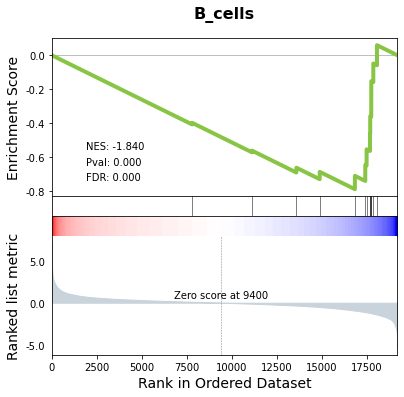

In [18]:
from gseapy import gseaplot, heatmap

terms = pre_res.res2d.index.tolist()
group = "B_cells"
i = terms.index(group)
# to save your figure, make sure that ofname is not None
gseaplot(rank_metric=pre_res.ranking,
         term=terms[i],
         **pre_res.results[terms[i]])

График ES для сигнатуры B cells на основе данных TPM

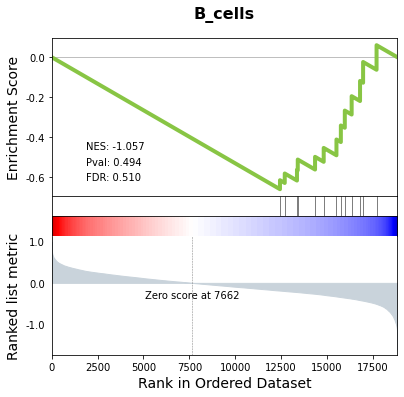

In [58]:
gseaplot(rank_metric=gs_res.ranking,
         term=terms[i],
         **gs_res.results[terms[i]])

In [44]:
pre_df = pre_res.res2d
gs_df = gs_res.res2d

Но при этом FDR не имеет линейной зависимости

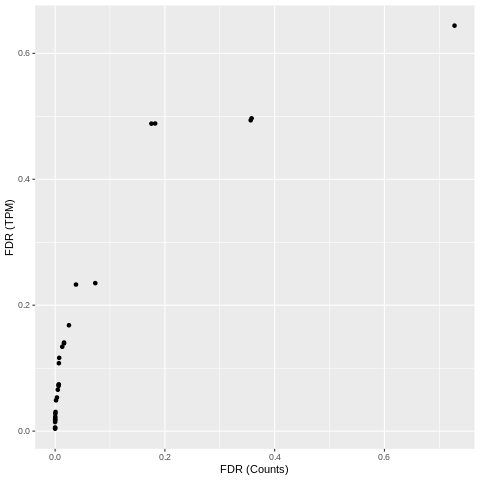

In [54]:
%%R -i pre_df -i gs_df

fdr_df <- data.frame(pre_df$fdr, gs_df$fdr)
fdr_df %>% ggplot(aes(x = pre_df$fdr, y = gs_df$fdr)) + 
  geom_point() +
  xlab('FDR (Counts)') +
  ylab('FDR (TPM)')

В целом, можно заметить линейную зависимость Normalized Enrichment Score (NES) результаты DESeq2 на основе данных каунтов (Counts) и TPM.

`geom_smooth()` using formula = 'y ~ x'


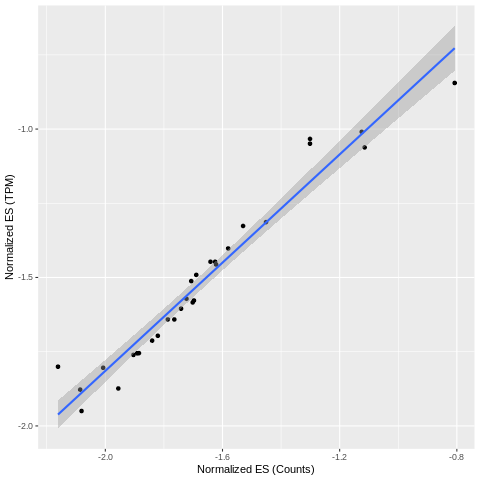

In [49]:
%%R -i pre_df -i gs_df

nes_df <- data.frame(pre_df$nes, gs_df$nes)
nes_df %>% ggplot(aes(x = pre_df$nes, y = gs_df$nes)) + 
  geom_point() +
  geom_smooth(method='lm') +
  xlab('Normalized ES (Counts)') +
  ylab('Normalized ES (TPM)')

Описание сигнатур каунтов в исследуемых образцах получилось примерно таким же, как и в случае с tpm. Некоторые сигнатуры каунтов находятся в самом начале списка, хотя эти же сигнатуры, но на основе данных tpm, находятся в конце списка. Например, такое явно наблюдается у сигнатуры B-cells. Выше можно увидеть значимые различия между двумя графиками ES для сигнатуры B cells.

Упорядочим результат GSEA Prerank, как $-\log \text{FDR}$ со знаком $\log \text{FC}$:

In [57]:
%%R -o res_pval

res_pval <- res[order(sign(res$log2FoldChange)*log10(res$padj)*(-1), decreasing = TRUE),]
head(res_pval)

          baseMean log2FoldChange     lfcSE     stat       pvalue         padj
AMBP     456.29178       4.583940 0.5590015 8.200229 2.399304e-16 3.684331e-13
SLC39A5  114.18886       5.135048 0.7132891 7.199112 6.060592e-13 3.102181e-10
PCSK1   2454.68395       5.601202 0.8240488 6.797173 1.066920e-11 3.024637e-09
UCN       41.98396       1.553380 0.2423253 6.410311 1.452235e-10 2.500965e-08
ATAT1    725.01348       1.135476 0.1794030 6.329193 2.464466e-10 3.983571e-08
ACMSD     36.47279       2.562023 0.4054457 6.319028 2.632131e-10 4.181231e-08


In [58]:
pval_res = gp.prerank(rnk=res_pval['log2FoldChange'],
                     gene_sets=signatures.copy(),
                     min_size=5,
                     max_size=1000,
                     permutation_num=1000, 
                     outdir=None, 
                     seed=6,
                     verbose=False
                    )

2023-01-01 17:25:02,218 Input gene rankings contains NA values(gene name and ranking value), drop them all!


In [59]:
pval_df = pval_res.res2d

`geom_smooth()` using formula = 'y ~ x'


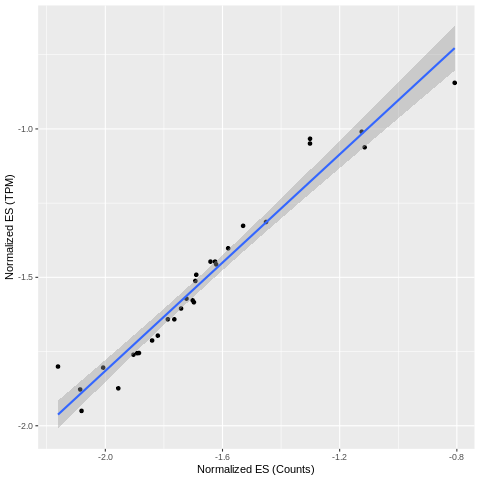

In [77]:
%%R -i pval_df -i gs_df

nes_df <- data.frame(gs_df$nes, pval_df$nes)
nes_df %>% ggplot(aes(x = pval_df$nes, y = gs_df$nes)) + 
  geom_point() +
  geom_smooth(method='lm') +
  xlab('Normalized ES (Counts)') +
  ylab('Normalized ES (TPM)')

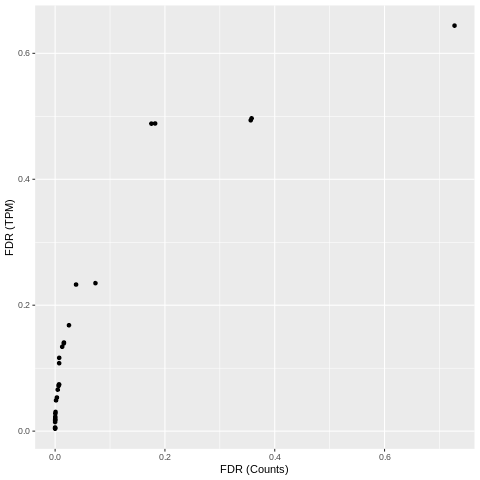

In [76]:
%%R -i pval_df -i gs_df

fdr_df1 <- data.frame(gs_df$fdr, pval_df$fdr)
fdr_df1 %>% ggplot(aes(x = pval_df$fdr, y = gs_df$fdr)) + 
  geom_point() +
  xlab('FDR (Counts)') +
  ylab('FDR (TPM)')

В данном случае мы получили примерно такие же результаты, как и в предыдщем случае.